In [265]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [266]:
df = pd.read_csv('car_insurance_claim.csv')
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [268]:
df.isnull().sum()

ID              0
KIDSDRIV        0
BIRTH           0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
URBANICITY      0
dtype: int64

In [ ]:
col_names = {
    'KIDSDRIV': 'num_young_drivers',
    'BIRTH': 'date_of_birth',
    'AGE': 'age',
    'HOMEKIDS': 'num_of_children',
    'YOJ': 'years_job_held_for',
    'INCOME': 'income',
    'PARENT1': 'single_parent',
    'HOME_VAL': 'value_of_home',
    'MSTATUS': 'married',
    'GENDER': 'gender',
    'EDUCATION': 'highest_education',
    'OCCUPATION': 'occupation',
    'TRAVTIME': 'commute_dist',
    'CAR_USE': 'type_of_use',
    'BLUEBOOK': 'vehicle_value',
    'TIF': 'policy_tenure',
    'CAR_TYPE': 'vehicle_type',
    'RED_CAR': 'red_vehicle',
    'OLDCLAIM': '5_year_total_claims_value',
    'CLM_FREQ': '5_year_num_of_claims',
    'REVOKED': 'licence_revoked',
    'MVR_PTS': 'license_points',
    'CLM_AMT': 'new_claim_value',
    'CAR_AGE': 'vehicle_age',
    'CLAIM_FLAG': 'is_claim',
    'URBANICITY': 'address_type'
}

df.rename(columns=col_names,inplace=True) #### rename the columns so they become much easier to read and understand ᡣ𐭩 •｡ꪆৎ ˚⋅

In [ ]:
df.info() #### there's so many things here we have to consider such as NaN values Objects, missy data and much much more ᡣ𐭩 •｡ꪆৎ ˚⋅

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         10302 non-null  int64  
 1   num_young_drivers          10302 non-null  int64  
 2   date_of_birth              10302 non-null  object 
 3   age                        10295 non-null  float64
 4   num_of_children            10302 non-null  int64  
 5   years_job_held_for         9754 non-null   float64
 6   income                     9732 non-null   object 
 7   single_parent              10302 non-null  object 
 8   value_of_home              9727 non-null   object 
 9   married                    10302 non-null  object 
 10  gender                     10302 non-null  object 
 11  highest_education          10302 non-null  object 
 12  occupation                 9637 non-null   object 
 13  commute_dist               10302 non-null  int

In [271]:
pd.set_option('display.max_columns', None)
df.head()

,ID,num_young_drivers,date_of_birth,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,highest_education,occupation,commute_dist,type_of_use,vehicle_value,policy_tenure,vehicle_type,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,is_claim,address_type
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [272]:
cols = ['income','value_of_home','vehicle_value','5_year_total_claims_value','new_claim_value']

In [273]:
for col in cols:
    df[col] = df[col].str.replace(r'[\$,]','',regex=True).astype('Int64')

### this loop to remove $ and , sign so we can converte these columns into Int64 ᡣ𐭩 •｡ꪆৎ ˚⋅

In [274]:
cols_z = ['married','gender','highest_education','occupation','vehicle_type','address_type']

In [275]:
for col in cols_z:
    df[col] = df[col].str.replace(r'[z_]','',regex=True)
#### remove prefix that contains z_ ᡣ𐭩 •｡ꪆৎ ˚⋅

In [276]:
df[cols_z] #### donneee ᡣ𐭩 •｡ꪆৎ ˚⋅

,married,gender,highest_education,occupation,vehicle_type,address_type
0,No,M,PhD,Professional,Minivan,Highly Urban/ Urban
1,No,M,High School,Blue Collar,Minivan,Highly Urban/ Urban
2,No,M,Bachelors,Manager,Van,Highly Urban/ Urban
3,Yes,F,High School,Clerical,SUV,Highly Urban/ Urban
4,Yes,M,<High School,Blue Collar,Minivan,Highly Urban/ Urban
...,...,...,...,...,...,...
10297,Yes,M,PhD,Manager,Minivan,Highly Urban/ Urban
10298,Yes,M,Masters,NaN,Panel Truck,Highly Urban/ Urban
10299,Yes,F,<High School,Blue Collar,SUV,Highly Urban/ Urban
10300,Yes,F,Bachelors,Home Maker,Minivan,Highly Urban/ Urban


In [277]:
df.drop(columns=['ID','date_of_birth'],inplace=True)
#### we have droped the useless columns such as ID || Date_of_birth because,
#### they won't help in our prediction ᡣ𐭩 •｡ꪆৎ ˚⋅


In [278]:
df

,num_young_drivers,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,highest_education,occupation,commute_dist,type_of_use,vehicle_value,policy_tenure,vehicle_type,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,is_claim,address_type
0,0,60.0,0,11.0,67349,No,0,No,M,PhD,Professional,14,Private,14230,11,Minivan,yes,4461,2,No,3,0,18.0,0,Highly Urban/ Urban
1,0,43.0,0,11.0,91449,No,257252,No,M,High School,Blue Collar,22,Commercial,14940,1,Minivan,yes,0,0,No,0,0,1.0,0,Highly Urban/ Urban
2,0,48.0,0,11.0,52881,No,0,No,M,Bachelors,Manager,26,Private,21970,1,Van,yes,0,0,No,2,0,10.0,0,Highly Urban/ Urban
3,0,35.0,1,10.0,16039,No,124191,Yes,F,High School,Clerical,5,Private,4010,4,SUV,no,38690,2,No,3,0,10.0,0,Highly Urban/ Urban
4,0,51.0,0,14.0,<NA>,No,306251,Yes,M,<High School,Blue Collar,32,Private,15440,7,Minivan,yes,0,0,No,0,0,6.0,0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669,No,386273,Yes,M,PhD,Manager,21,Private,13270,15,Minivan,no,0,0,No,2,0,17.0,0,Highly Urban/ Urban
10298,0,46.0,0,9.0,107204,No,332591,Yes,M,Masters,NaN,36,Commercial,24490,6,Panel Truck,no,0,0,No,0,0,1.0,0,Highly Urban/ Urban
10299,0,48.0,0,15.0,39837,No,170611,Yes,F,<High School,Blue Collar,12,Private,13820,7,SUV,no,0,0,No,0,0,1.0,0,Highly Urban/ Urban
10300,0,50.0,0,7.0,43445,No,149248,Yes,F,Bachelors,Home Maker,36,Private,22550,6,Minivan,no,0,0,No,0,0,11.0,0,Highly Urban/ Urban


In [ ]:
df.query('new_claim_value > 0 and is_claim == 0')


#### we have to check that no one has a value has consider as claimed ᡣ𐭩 •｡ꪆৎ ˚⋅

,num_young_drivers,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,highest_education,occupation,commute_dist,type_of_use,vehicle_value,policy_tenure,vehicle_type,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,is_claim,address_type


In [280]:
df['is_claim'].unique()

array([0, 1])

<Axes: xlabel='new_claim_value', ylabel='Count'>

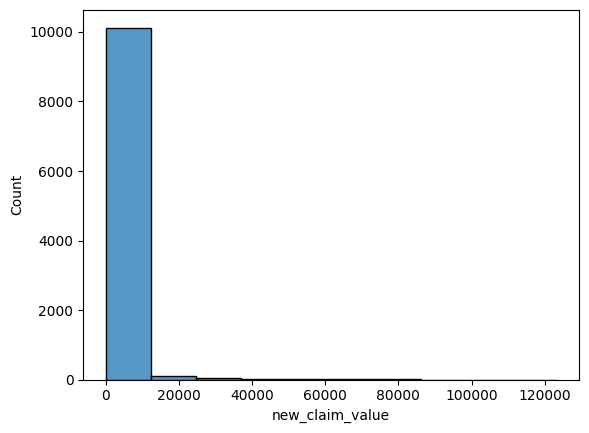

In [281]:
sns.histplot(df['new_claim_value'],bins=10)

In [282]:
bins = [0.0, 5000,10000,15000,20000,25000,30000,35000,40000,45000,50000,np.inf] ### define the bins so we can divide the continuose values into categorical ones
labels = ["Very Low", "Low", "Medium", "High", "Very High", "Extreme", "Ultra", "Mega", "Super", "Hyper", "Max"] #### labels for them !!

df['claim_value_cat'] = pd.cut(df['new_claim_value'],bins = bins,labels=labels,include_lowest=True)

<Axes: ylabel='claim_value_cat'>

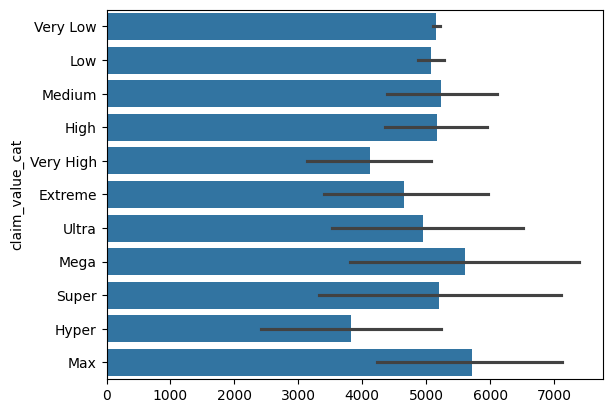

In [ ]:
sns.barplot(df['claim_value_cat']) ### just so we can see the range of new_claim_value by ranging it in term of category instead of numbers

In [284]:
df.columns

Index(['num_young_drivers', 'age', 'num_of_children', 'years_job_held_for',
       'income', 'single_parent', 'value_of_home', 'married', 'gender',
       'highest_education', 'occupation', 'commute_dist', 'type_of_use',
       'vehicle_value', 'policy_tenure', 'vehicle_type', 'red_vehicle',
       '5_year_total_claims_value', '5_year_num_of_claims', 'licence_revoked',
       'license_points', 'new_claim_value', 'vehicle_age', 'is_claim',
       'address_type', 'claim_value_cat'],
      dtype='object')

In [285]:
df['claim_value_cat']

0        Very Low
1        Very Low
2        Very Low
3        Very Low
4        Very Low
           ...   
10297    Very Low
10298    Very Low
10299    Very Low
10300    Very Low
10301    Very Low
Name: claim_value_cat, Length: 10302, dtype: category
Categories (11, object): ['Very Low' < 'Low' < 'Medium' < 'High' ... 'Mega' < 'Super' < 'Hyper' < 'Max']

In [286]:
X = df.drop(columns=['is_claim']).copy()
y = df['is_claim']

In [287]:
y.unique() ### just to make sure our target variable is 0 & 1 since we are doing Binary Classification ᡣ𐭩 •｡ꪆৎ ˚⋅

array([0, 1])

In [288]:
X.columns ### donee ᡣ𐭩 •｡ꪆৎ ˚⋅

Index(['num_young_drivers', 'age', 'num_of_children', 'years_job_held_for',
       'income', 'single_parent', 'value_of_home', 'married', 'gender',
       'highest_education', 'occupation', 'commute_dist', 'type_of_use',
       'vehicle_value', 'policy_tenure', 'vehicle_type', 'red_vehicle',
       '5_year_total_claims_value', '5_year_num_of_claims', 'licence_revoked',
       'license_points', 'new_claim_value', 'vehicle_age', 'address_type',
       'claim_value_cat'],
      dtype='object')

<Axes: >

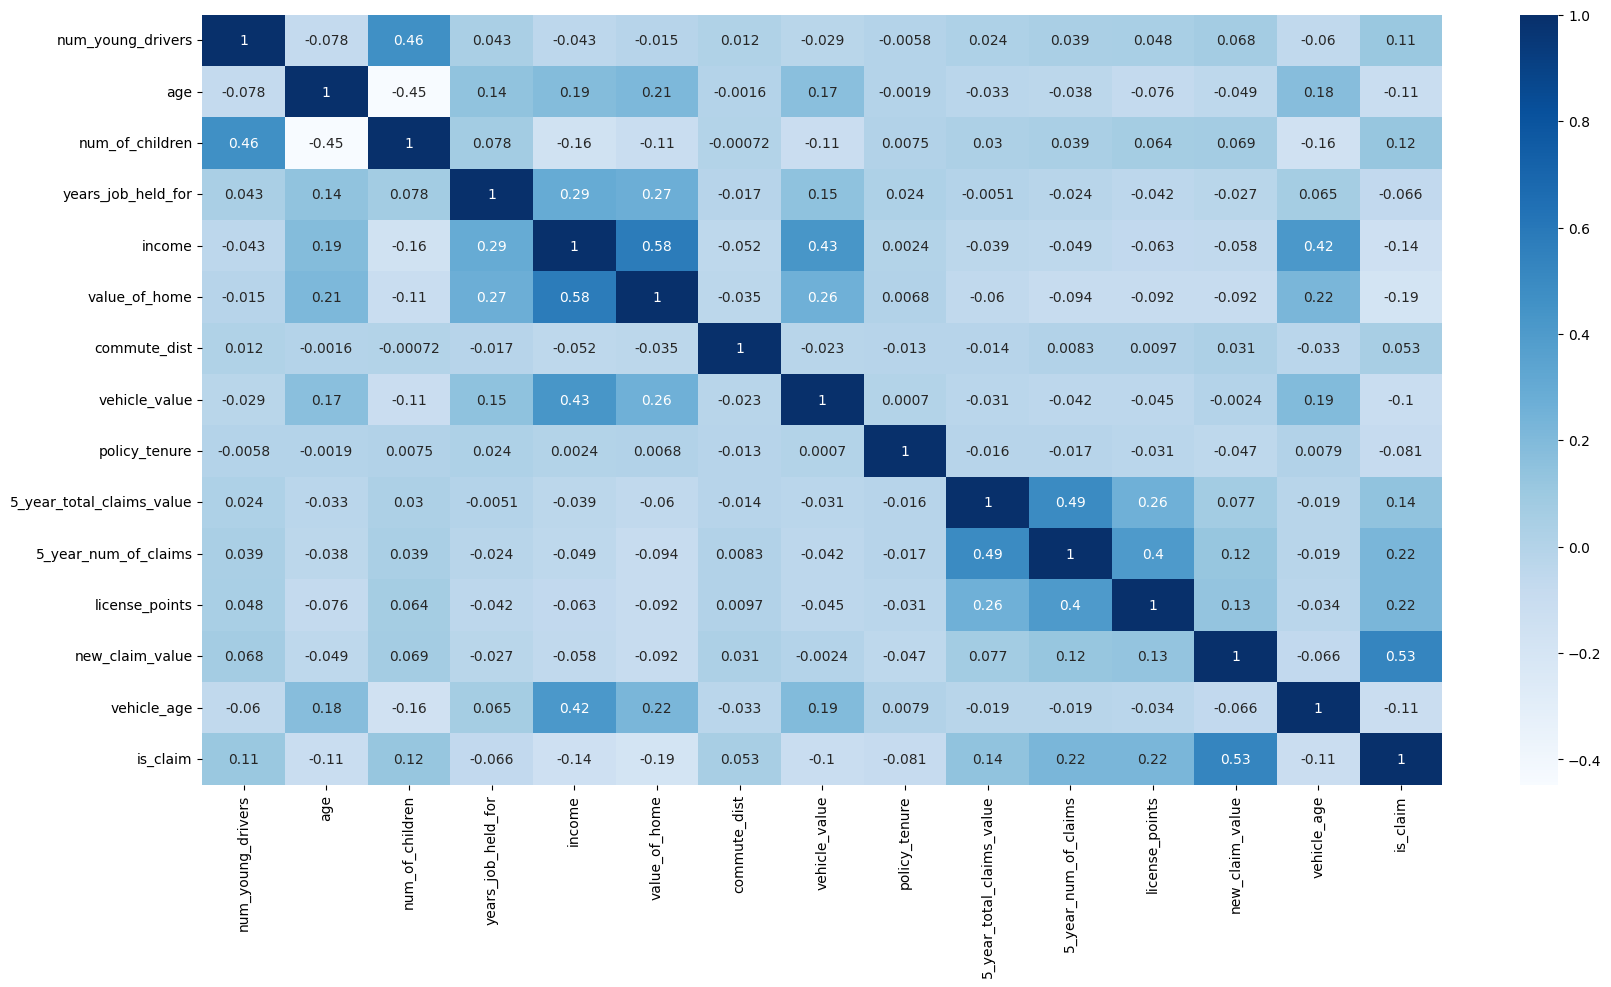

In [289]:
plt.figure(figsize=(20,10))

heat_map = df.corr(numeric_only=True)
sns.heatmap(data=heat_map,cmap='Blues',annot=True) #### just so can we see the linear coorelation between columsn and targer variable ᡣ𐭩 •｡ꪆৎ ˚⋅

Explority Data Analysis (EDA)

In [290]:
eda_test_data = X.copy()
eda_test_data['is_claim'] = y

In [291]:
eda_test_data

,num_young_drivers,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,highest_education,occupation,commute_dist,type_of_use,vehicle_value,policy_tenure,vehicle_type,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,address_type,claim_value_cat,is_claim
0,0,60.0,0,11.0,67349,No,0,No,M,PhD,Professional,14,Private,14230,11,Minivan,yes,4461,2,No,3,0,18.0,Highly Urban/ Urban,Very Low,0
1,0,43.0,0,11.0,91449,No,257252,No,M,High School,Blue Collar,22,Commercial,14940,1,Minivan,yes,0,0,No,0,0,1.0,Highly Urban/ Urban,Very Low,0
2,0,48.0,0,11.0,52881,No,0,No,M,Bachelors,Manager,26,Private,21970,1,Van,yes,0,0,No,2,0,10.0,Highly Urban/ Urban,Very Low,0
3,0,35.0,1,10.0,16039,No,124191,Yes,F,High School,Clerical,5,Private,4010,4,SUV,no,38690,2,No,3,0,10.0,Highly Urban/ Urban,Very Low,0
4,0,51.0,0,14.0,<NA>,No,306251,Yes,M,<High School,Blue Collar,32,Private,15440,7,Minivan,yes,0,0,No,0,0,6.0,Highly Urban/ Urban,Very Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669,No,386273,Yes,M,PhD,Manager,21,Private,13270,15,Minivan,no,0,0,No,2,0,17.0,Highly Urban/ Urban,Very Low,0
10298,0,46.0,0,9.0,107204,No,332591,Yes,M,Masters,NaN,36,Commercial,24490,6,Panel Truck,no,0,0,No,0,0,1.0,Highly Urban/ Urban,Very Low,0
10299,0,48.0,0,15.0,39837,No,170611,Yes,F,<High School,Blue Collar,12,Private,13820,7,SUV,no,0,0,No,0,0,1.0,Highly Urban/ Urban,Very Low,0
10300,0,50.0,0,7.0,43445,No,149248,Yes,F,Bachelors,Home Maker,36,Private,22550,6,Minivan,no,0,0,No,0,0,11.0,Highly Urban/ Urban,Very Low,0


In [359]:
from sklearn.preprocessing import LabelEncoder
##### Let's do some Encoding while we have just binary Category it's better to use Labelencoder than get_dummies  it will put them within 1 column ᡣ𐭩 •｡ꪆৎ ˚⋅

encode =LabelEncoder()

eda_test_data['single_parent'] = encode.fit_transform(eda_test_data['single_parent'])
eda_test_data['gender'] = encode.fit_transform(eda_test_data['gender'])
eda_test_data['married'] = encode.fit_transform(eda_test_data['married'])
eda_test_data['red_vehicle'] = encode.fit_transform(eda_test_data['red_vehicle'])
eda_test_data['licence_revoked'] = encode.fit_transform(eda_test_data['licence_revoked'])


In [ ]:
eda_test_data.columns 

Index(['num_young_drivers', 'age', 'num_of_children', 'years_job_held_for',
       'income', 'single_parent', 'value_of_home', 'married', 'gender',
       'highest_education', 'occupation', 'commute_dist', 'type_of_use',
       'vehicle_value', 'policy_tenure', 'vehicle_type', 'red_vehicle',
       '5_year_total_claims_value', '5_year_num_of_claims', 'licence_revoked',
       'license_points', 'new_claim_value', 'vehicle_age', 'address_type',
       'claim_value_cat', 'is_claim'],
      dtype='object')

In [ ]:
eda_test_data.info() ### it works Yayyy ᡣ𐭩 •｡ꪆৎ ˚⋅

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   num_young_drivers          10302 non-null  int64   
 1   age                        10295 non-null  float64 
 2   num_of_children            10302 non-null  int64   
 3   years_job_held_for         9754 non-null   float64 
 4   income                     9732 non-null   Int64   
 5   single_parent              10302 non-null  int64   
 6   value_of_home              9727 non-null   Int64   
 7   married                    10302 non-null  int64   
 8   gender                     10302 non-null  int64   
 9   highest_education          10302 non-null  object  
 10  occupation                 9637 non-null   object  
 11  commute_dist               10302 non-null  int64   
 12  type_of_use                10302 non-null  object  
 13  vehicle_value              1030

In [295]:
eda_test_data['type_of_use'].unique()

array(['Private', 'Commercial'], dtype=object)

In [296]:
eda_test_data['address_type'].unique()

array(['Highly Urban/ Urban', 'Highly Rural/ Rural'], dtype=object)

In [297]:
eda_test_data['highest_education'].unique()

array(['PhD', 'High School', 'Bachelors', '<High School', 'Masters'],
      dtype=object)

In [298]:
eda_test_data['occupation'].unique()

array(['Professional', 'Blue Collar', 'Manager', 'Clerical', 'Doctor',
       'Lawyer', nan, 'Home Maker', 'Student'], dtype=object)

In [299]:
eda_test_data['vehicle_type'].unique()

array(['Minivan', 'Van', 'SUV', 'Sports Car', 'Panel Truck', 'Pickup'],
      dtype=object)

<Axes: >

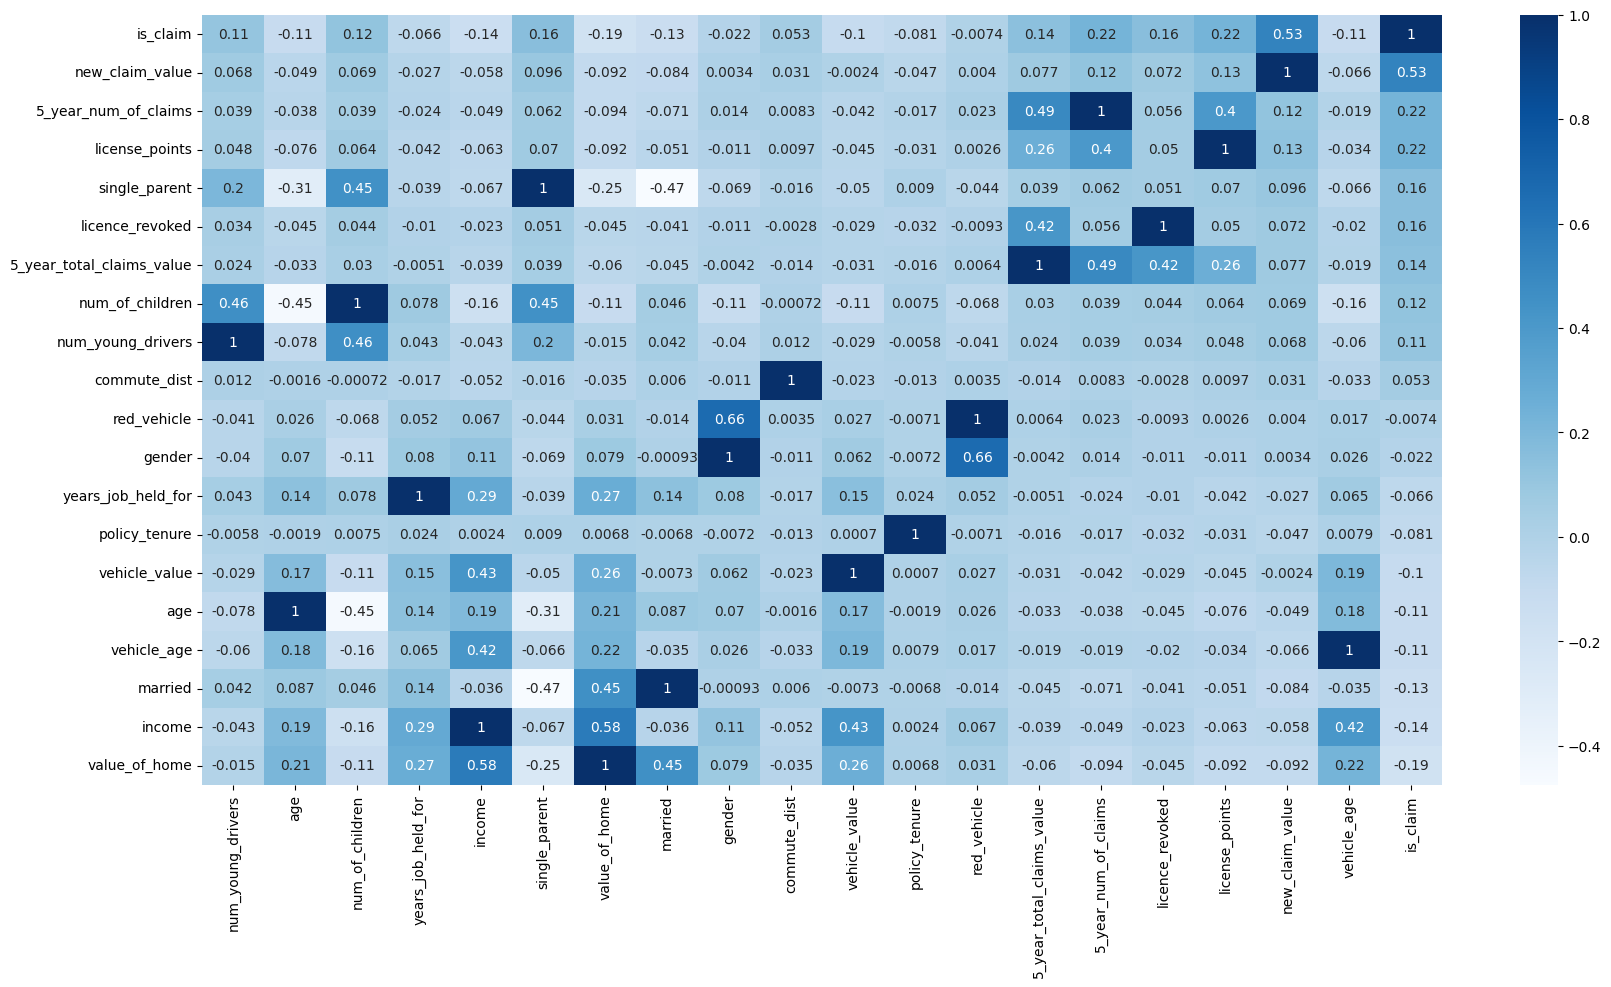

In [300]:
plt.figure(figsize=(20,10))
corr_eda = eda_test_data.corr(numeric_only=True).sort_values(by ='is_claim',ascending = False)
sns.heatmap(data=corr_eda,cmap='Blues',annot=True)

* Droping Red_Vehicle Feature

## Handle NaN Values using KNN Imputer

** we have 2 options 
1- we have to handle the NaN Values so we can run Logistic Regression we can do so by KNN Imputer 

2- we can keep the NaN values it won't effect us whenver we use XGboost or Random Forest it will be handled giving them the best branch

* we have some goals to achieve 
1- we have to handle the missing data if we want to compare XGBoost with other Algorithms it won't be fare to compare them within a different data

    - if we could to try some feature engineer that could help our data that would be perfect !!!
    - Step 1 & 2 will be made using pipline so our code be more organizing 

2- we have to standarlized this data because we have much different scalling in our Data some are between 1-90 and some are 10k+ this will effect model performance there's much gap between them


3- we will use Cross-validation to compare the Accuracy of the Algorithms (Logistic Regression, Decision Tree, Random Forest, Gradient Boost, XGBoost)

- and step 3 & 4 will be made using pipline 

4- whenever we pick up the algorithm that we need we have to find the best HyperParameter for it and this can be used using GridSearch()

In [301]:
eda_test_data

,num_young_drivers,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,highest_education,occupation,commute_dist,type_of_use,vehicle_value,policy_tenure,vehicle_type,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,address_type,claim_value_cat,is_claim
0,0,60.0,0,11.0,67349,0,0,0,1,PhD,Professional,14,Private,14230,11,Minivan,1,4461,2,0,3,0,18.0,Highly Urban/ Urban,Very Low,0
1,0,43.0,0,11.0,91449,0,257252,0,1,High School,Blue Collar,22,Commercial,14940,1,Minivan,1,0,0,0,0,0,1.0,Highly Urban/ Urban,Very Low,0
2,0,48.0,0,11.0,52881,0,0,0,1,Bachelors,Manager,26,Private,21970,1,Van,1,0,0,0,2,0,10.0,Highly Urban/ Urban,Very Low,0
3,0,35.0,1,10.0,16039,0,124191,1,0,High School,Clerical,5,Private,4010,4,SUV,0,38690,2,0,3,0,10.0,Highly Urban/ Urban,Very Low,0
4,0,51.0,0,14.0,<NA>,0,306251,1,1,<High School,Blue Collar,32,Private,15440,7,Minivan,1,0,0,0,0,0,6.0,Highly Urban/ Urban,Very Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669,0,386273,1,1,PhD,Manager,21,Private,13270,15,Minivan,0,0,0,0,2,0,17.0,Highly Urban/ Urban,Very Low,0
10298,0,46.0,0,9.0,107204,0,332591,1,1,Masters,NaN,36,Commercial,24490,6,Panel Truck,0,0,0,0,0,0,1.0,Highly Urban/ Urban,Very Low,0
10299,0,48.0,0,15.0,39837,0,170611,1,0,<High School,Blue Collar,12,Private,13820,7,SUV,0,0,0,0,0,0,1.0,Highly Urban/ Urban,Very Low,0
10300,0,50.0,0,7.0,43445,0,149248,1,0,Bachelors,Home Maker,36,Private,22550,6,Minivan,0,0,0,0,0,0,11.0,Highly Urban/ Urban,Very Low,0


In [302]:
eda_test_data.isnull().sum() ### as we can see we don't have that much of data liek if we compare it to the number of row it's nothing and that benefit us for sure 

num_young_drivers              0
age                            7
num_of_children                0
years_job_held_for           548
income                       570
single_parent                  0
value_of_home                575
married                        0
gender                         0
highest_education              0
occupation                   665
commute_dist                   0
type_of_use                    0
vehicle_value                  0
policy_tenure                  0
vehicle_type                   0
red_vehicle                    0
5_year_total_claims_value      0
5_year_num_of_claims           0
licence_revoked                0
license_points                 0
new_claim_value                0
vehicle_age                  639
address_type                   0
claim_value_cat                0
is_claim                       0
dtype: int64

In [303]:
"""
let's create our KNN Imputer: how it works it will look the most familier row for the NaN row and pick it up 
1- it will take the sqrt(first feqture and second etc.. ) to calculate distance 
2- if you have picked the K-Neighbors for it let's say the default one = 2 we will take the shortest 2 and we will take the missing column values
3- it can fill the data using 2 methods, 1 weights = 'uniform' which will take the average of the missing column feature and it will be set, 2 weight = 'distance'
we will divide 1/distance for both neighbors we will get weight 1,2 and we calculate the total weight, then the formula is (value * w1) + (value * w2)/total weight
"""
df_sample_no_na = eda_test_data.copy()
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler

numerical_cols = ['age','years_job_held_for','income','value_of_home','vehicle_age']
categorical_cols = ['occupation']


knn_num = KNNImputer(n_neighbors=5,weights='distance')
df_sample_no_na[numerical_cols] = knn_num.fit_transform(eda_test_data[numerical_cols])

most_frequent_occupation = eda_test_data['occupation'].mode()[0]
df_sample_no_na['occupation'].fillna(most_frequent_occupation, inplace=True)




/tmp/ipykernel_8234/831470423.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sample_no_na['occupation'].fillna(most_frequent_occupation, inplace=True)


In [304]:
df_sample_no_na.isnull().sum() #### it's done no more NaN values now let's scale the Numerical Values !!

num_young_drivers            0
age                          0
num_of_children              0
years_job_held_for           0
income                       0
single_parent                0
value_of_home                0
married                      0
gender                       0
highest_education            0
occupation                   0
commute_dist                 0
type_of_use                  0
vehicle_value                0
policy_tenure                0
vehicle_type                 0
red_vehicle                  0
5_year_total_claims_value    0
5_year_num_of_claims         0
licence_revoked              0
license_points               0
new_claim_value              0
vehicle_age                  0
address_type                 0
claim_value_cat              0
is_claim                     0
dtype: int64

In [305]:
df_sample_no_na.describe() # Look at this data it's Unbelivable missy

,num_young_drivers,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,commute_dist,vehicle_value,policy_tenure,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,is_claim
count,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.0,10302.000000,10302.000000,10302.0,10302.000000,10302.000000,10302.000000,10302.0,10302.000000,10302.000000
mean,0.169288,44.836711,0.720443,10.417300,61366.302810,0.130363,154153.557233,0.600660,0.461755,33.416424,15659.923316,5.329159,0.288876,4033.977868,0.800718,0.122403,1.710153,1511.266453,8.257231,0.266550
std,0.506512,8.603648,1.116323,4.082195,46822.572316,0.336719,127147.037471,0.489787,0.498559,15.869687,8428.765264,4.110795,0.453262,8733.143119,1.154079,0.327767,2.159015,4725.249896,5.603237,0.442177
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,-3.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,27958.750000,0.000000,0.000000,0.000000,0.000000,22.000000,9200.0,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,3.000000,0.000000
50%,0.000000,45.000000,0.000000,11.000000,53726.500000,0.000000,160428.000000,1.000000,0.000000,33.000000,14400.0,4.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,8.000000,0.000000
75%,0.000000,51.000000,1.000000,13.000000,85494.000000,0.000000,235871.000000,1.000000,1.000000,44.000000,20890.0,7.000000,1.000000,4647.5,2.000000,0.000000,3.000000,1144.75,12.000000,1.000000
max,4.000000,81.000000,5.000000,23.000000,367030.000000,1.000000,885282.000000,1.000000,1.000000,142.000000,69740.0,25.000000,1.000000,57037.0,5.000000,1.000000,13.000000,123247.0,28.000000,1.000000


In [306]:
df_sample_no_na
#### as we can see in 3rd row in years_job_held_
#### first row shows that his age is 54 and the year_job 14
#### in our case 3rd row was NaN his age is 50 and it predicted that his year_job 10 which absolutely make since

,num_young_drivers,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,highest_education,occupation,commute_dist,type_of_use,vehicle_value,policy_tenure,vehicle_type,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,address_type,claim_value_cat,is_claim
0,0,60.0,0,11.0,67349.000000,0,0.0,0,1,PhD,Professional,14,Private,14230,11,Minivan,1,4461,2,0,3,0,18.0,Highly Urban/ Urban,Very Low,0
1,0,43.0,0,11.0,91449.000000,0,257252.0,0,1,High School,Blue Collar,22,Commercial,14940,1,Minivan,1,0,0,0,0,0,1.0,Highly Urban/ Urban,Very Low,0
2,0,48.0,0,11.0,52881.000000,0,0.0,0,1,Bachelors,Manager,26,Private,21970,1,Van,1,0,0,0,2,0,10.0,Highly Urban/ Urban,Very Low,0
3,0,35.0,1,10.0,16039.000000,0,124191.0,1,0,High School,Clerical,5,Private,4010,4,SUV,0,38690,2,0,3,0,10.0,Highly Urban/ Urban,Very Low,0
4,0,51.0,0,14.0,64923.190842,0,306251.0,1,1,<High School,Blue Collar,32,Private,15440,7,Minivan,1,0,0,0,0,0,6.0,Highly Urban/ Urban,Very Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669.000000,0,386273.0,1,1,PhD,Manager,21,Private,13270,15,Minivan,0,0,0,0,2,0,17.0,Highly Urban/ Urban,Very Low,0
10298,0,46.0,0,9.0,107204.000000,0,332591.0,1,1,Masters,Blue Collar,36,Commercial,24490,6,Panel Truck,0,0,0,0,0,0,1.0,Highly Urban/ Urban,Very Low,0
10299,0,48.0,0,15.0,39837.000000,0,170611.0,1,0,<High School,Blue Collar,12,Private,13820,7,SUV,0,0,0,0,0,0,1.0,Highly Urban/ Urban,Very Low,0
10300,0,50.0,0,7.0,43445.000000,0,149248.0,1,0,Bachelors,Home Maker,36,Private,22550,6,Minivan,0,0,0,0,0,0,11.0,Highly Urban/ Urban,Very Low,0


In [307]:
eda_test_data

,num_young_drivers,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,highest_education,occupation,commute_dist,type_of_use,vehicle_value,policy_tenure,vehicle_type,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,address_type,claim_value_cat,is_claim
0,0,60.0,0,11.0,67349,0,0,0,1,PhD,Professional,14,Private,14230,11,Minivan,1,4461,2,0,3,0,18.0,Highly Urban/ Urban,Very Low,0
1,0,43.0,0,11.0,91449,0,257252,0,1,High School,Blue Collar,22,Commercial,14940,1,Minivan,1,0,0,0,0,0,1.0,Highly Urban/ Urban,Very Low,0
2,0,48.0,0,11.0,52881,0,0,0,1,Bachelors,Manager,26,Private,21970,1,Van,1,0,0,0,2,0,10.0,Highly Urban/ Urban,Very Low,0
3,0,35.0,1,10.0,16039,0,124191,1,0,High School,Clerical,5,Private,4010,4,SUV,0,38690,2,0,3,0,10.0,Highly Urban/ Urban,Very Low,0
4,0,51.0,0,14.0,<NA>,0,306251,1,1,<High School,Blue Collar,32,Private,15440,7,Minivan,1,0,0,0,0,0,6.0,Highly Urban/ Urban,Very Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669,0,386273,1,1,PhD,Manager,21,Private,13270,15,Minivan,0,0,0,0,2,0,17.0,Highly Urban/ Urban,Very Low,0
10298,0,46.0,0,9.0,107204,0,332591,1,1,Masters,NaN,36,Commercial,24490,6,Panel Truck,0,0,0,0,0,0,1.0,Highly Urban/ Urban,Very Low,0
10299,0,48.0,0,15.0,39837,0,170611,1,0,<High School,Blue Collar,12,Private,13820,7,SUV,0,0,0,0,0,0,1.0,Highly Urban/ Urban,Very Low,0
10300,0,50.0,0,7.0,43445,0,149248,1,0,Bachelors,Home Maker,36,Private,22550,6,Minivan,0,0,0,0,0,0,11.0,Highly Urban/ Urban,Very Low,0


In [308]:
df_sample_no_na['highest_education'].unique() ### we have to replace this < High School

array(['PhD', 'High School', 'Bachelors', '<High School', 'Masters'],
      dtype=object)

In [309]:
df_sample_no_na['highest_education'] = df_sample_no_na['highest_education'].replace('<High School','High School')

### Visualization Data and Explore it

* as we can see in the HeatMap who claims the insurance mostly are High School which is make since becasue most of the accident are from the teenagers and to make sure our theory is correct in the second place comes the Bachelors

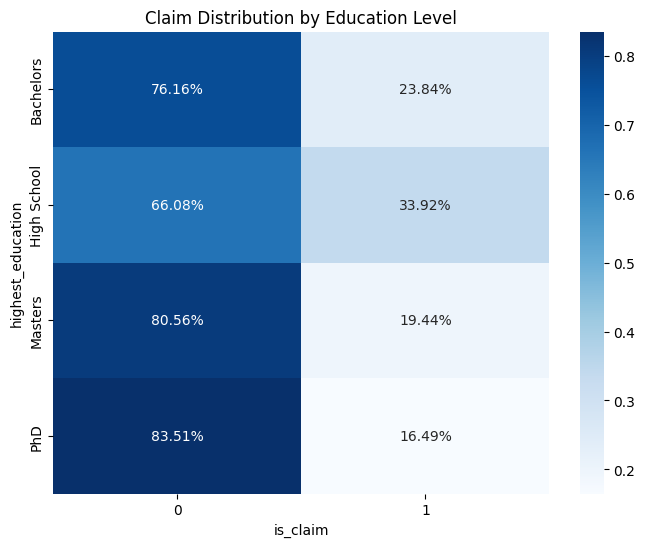

In [310]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df_sample_no_na['highest_education'], 
                        df_sample_no_na['is_claim'], 
                        normalize='index')

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='.2%', cmap='Blues')
plt.title('Claim Distribution by Education Level')
plt.show()

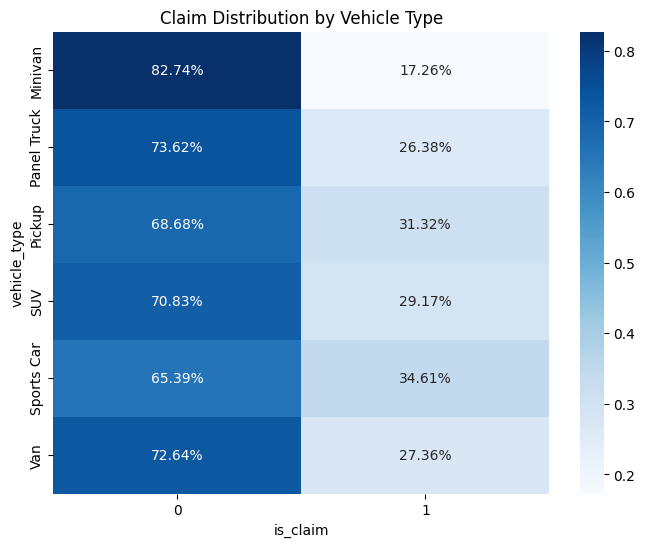

In [311]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df_sample_no_na['vehicle_type'], 
                        df_sample_no_na['is_claim'], 
                        normalize='index')

plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='.2%', cmap='Blues')
plt.title('Claim Distribution by Vehicle Type')
plt.show()

* we can see in this plot that PHD got the highest vehicle Value even in term of median and quantile as expcted 


* then as we can tell the lowest one is the High School which the mean is arount 8k and the maximum with small amount of people is 45k

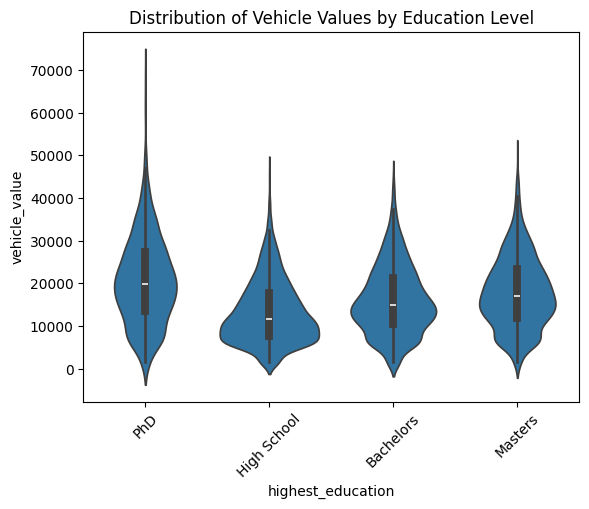

In [312]:
sns.violinplot(x='highest_education', y='vehicle_value', data=df_sample_no_na)
plt.xticks(rotation=45)
plt.title('Distribution of Vehicle Values by Education Level')
plt.show()

* we will delete this one but it's really important when we want to analyse the data because this shows that who get accepted to the claim are between 18-25 with 65% which keep us with who didn't get accepted with 35%

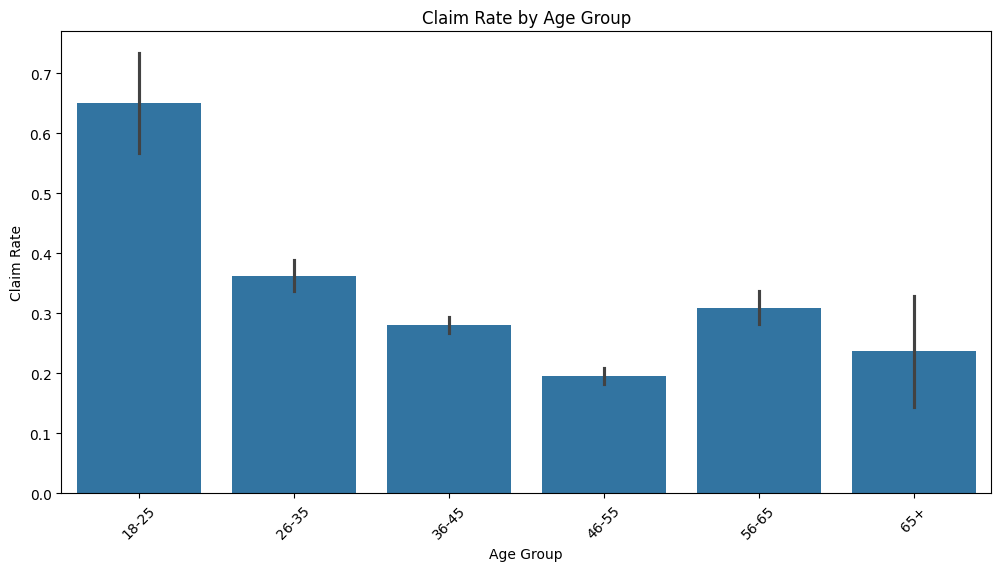

In [313]:
# Create age groups (customize ranges as needed)
df_sample_no_na['age_group'] = pd.cut(df_sample_no_na['age'], 
                                     bins=[0, 25, 35, 45, 55, 65, 100],
                                     labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

# Plot with age groups
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='is_claim', data=df_sample_no_na, estimator='mean')
plt.title('Claim Rate by Age Group')
plt.ylabel('Claim Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()

* As expected here Urban is usually has more traffic and accidents higher premium rates, in other hands Rural has less traffic and accidents, most accidents there happens because of speed limits

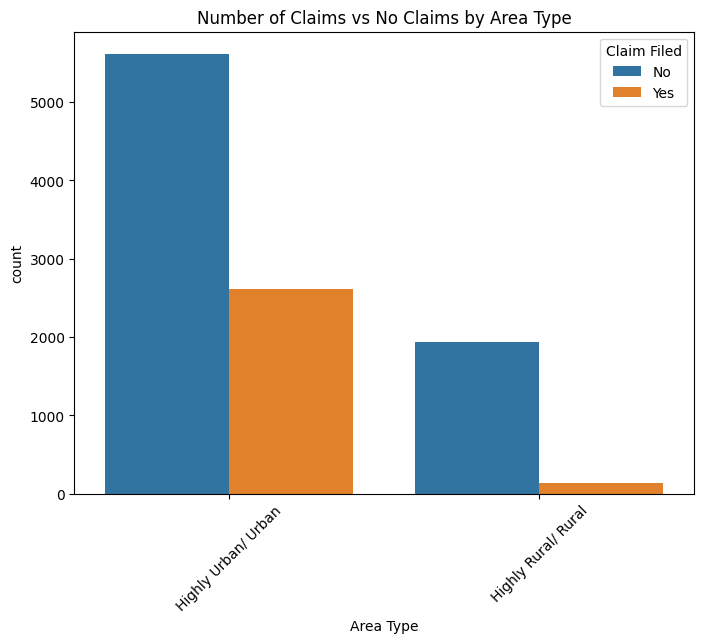

In [314]:
plt.figure(figsize=(8, 6))
sns.countplot(x='address_type', hue='is_claim', data=df_sample_no_na)
plt.title('Number of Claims vs No Claims by Area Type')
plt.xlabel('Area Type')
plt.xticks(rotation=45)
plt.legend(title='Claim Filed', labels=['No', 'Yes'])
plt.show()

In [315]:

df_sample_no_na.drop(columns=['claim_value_cat','age_group'],inplace=True)

In [316]:
df_sample_no_na.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_young_drivers          10302 non-null  int64  
 1   age                        10302 non-null  float64
 2   num_of_children            10302 non-null  int64  
 3   years_job_held_for         10302 non-null  float64
 4   income                     10302 non-null  float64
 5   single_parent              10302 non-null  int64  
 6   value_of_home              10302 non-null  float64
 7   married                    10302 non-null  int64  
 8   gender                     10302 non-null  int64  
 9   highest_education          10302 non-null  object 
 10  occupation                 10302 non-null  object 
 11  commute_dist               10302 non-null  int64  
 12  type_of_use                10302 non-null  object 
 13  vehicle_value              10302 non-null  Int

####  Encoding Features

In [317]:
df_sample_no_na['highest_education'].unique()

array(['PhD', 'High School', 'Bachelors', 'Masters'], dtype=object)

In [318]:
df_sample_no_na_encoded= pd.get_dummies(df_sample_no_na,columns=['highest_education','occupation','vehicle_type'],drop_first=True,dtype=int)
df_sample_no_na_encoded

,num_young_drivers,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,commute_dist,type_of_use,vehicle_value,policy_tenure,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,address_type,is_claim,highest_education_High School,highest_education_Masters,highest_education_PhD,occupation_Clerical,occupation_Doctor,occupation_Home Maker,occupation_Lawyer,occupation_Manager,occupation_Professional,occupation_Student,vehicle_type_Panel Truck,vehicle_type_Pickup,vehicle_type_SUV,vehicle_type_Sports Car,vehicle_type_Van
0,0,60.0,0,11.0,67349.000000,0,0.0,0,1,14,Private,14230,11,1,4461,2,0,3,0,18.0,Highly Urban/ Urban,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,43.0,0,11.0,91449.000000,0,257252.0,0,1,22,Commercial,14940,1,1,0,0,0,0,0,1.0,Highly Urban/ Urban,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,48.0,0,11.0,52881.000000,0,0.0,0,1,26,Private,21970,1,1,0,0,0,2,0,10.0,Highly Urban/ Urban,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,35.0,1,10.0,16039.000000,0,124191.0,1,0,5,Private,4010,4,0,38690,2,0,3,0,10.0,Highly Urban/ Urban,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,51.0,0,14.0,64923.190842,0,306251.0,1,1,32,Private,15440,7,1,0,0,0,0,0,6.0,Highly Urban/ Urban,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669.000000,0,386273.0,1,1,21,Private,13270,15,0,0,0,0,2,0,17.0,Highly Urban/ Urban,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
10298,0,46.0,0,9.0,107204.000000,0,332591.0,1,1,36,Commercial,24490,6,0,0,0,0,0,0,1.0,Highly Urban/ Urban,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
10299,0,48.0,0,15.0,39837.000000,0,170611.0,1,0,12,Private,13820,7,0,0,0,0,0,0,1.0,Highly Urban/ Urban,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10300,0,50.0,0,7.0,43445.000000,0,149248.0,1,0,36,Private,22550,6,0,0,0,0,0,0,11.0,Highly Urban/ Urban,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [319]:
df_sample_no_na['type_of_use'].unique()

array(['Private', 'Commercial'], dtype=object)

In [320]:
df_sample_no_na['address_type'].unique()

array(['Highly Urban/ Urban', 'Highly Rural/ Rural'], dtype=object)

In [321]:
df_sample_no_na_encoded['type_of_use'] = encode.fit_transform(df_sample_no_na_encoded['type_of_use'])
df_sample_no_na_encoded['address_type'] = encode.fit_transform(df_sample_no_na_encoded['address_type'])

In [322]:
df_sample_no_na_encoded

,num_young_drivers,age,num_of_children,years_job_held_for,income,single_parent,value_of_home,married,gender,commute_dist,type_of_use,vehicle_value,policy_tenure,red_vehicle,5_year_total_claims_value,5_year_num_of_claims,licence_revoked,license_points,new_claim_value,vehicle_age,address_type,is_claim,highest_education_High School,highest_education_Masters,highest_education_PhD,occupation_Clerical,occupation_Doctor,occupation_Home Maker,occupation_Lawyer,occupation_Manager,occupation_Professional,occupation_Student,vehicle_type_Panel Truck,vehicle_type_Pickup,vehicle_type_SUV,vehicle_type_Sports Car,vehicle_type_Van
0,0,60.0,0,11.0,67349.000000,0,0.0,0,1,14,1,14230,11,1,4461,2,0,3,0,18.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,43.0,0,11.0,91449.000000,0,257252.0,0,1,22,0,14940,1,1,0,0,0,0,0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,48.0,0,11.0,52881.000000,0,0.0,0,1,26,1,21970,1,1,0,0,0,2,0,10.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,35.0,1,10.0,16039.000000,0,124191.0,1,0,5,1,4010,4,0,38690,2,0,3,0,10.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0,51.0,0,14.0,64923.190842,0,306251.0,1,1,32,1,15440,7,1,0,0,0,0,0,6.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,9.0,164669.000000,0,386273.0,1,1,21,1,13270,15,0,0,0,0,2,0,17.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
10298,0,46.0,0,9.0,107204.000000,0,332591.0,1,1,36,0,24490,6,0,0,0,0,0,0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
10299,0,48.0,0,15.0,39837.000000,0,170611.0,1,0,12,1,13820,7,0,0,0,0,0,0,1.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10300,0,50.0,0,7.0,43445.000000,0,149248.0,1,0,36,1,22550,6,0,0,0,0,0,0,11.0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### Train-Test Data & Cross Validation, GridSearchCV

In [346]:

X1 = df_sample_no_na_encoded.drop(columns=['is_claim','new_claim_value'])
y1 = df_sample_no_na_encoded['is_claim']
X_train, X_test, y_train,y_test = train_test_split(X1,y1,test_size=0.2,random_state=44)

In [347]:
X_train.shape

(8241, 35)

In [348]:
X_test.shape

(2061, 35)

In [349]:
y_test.sum()

np.int64(547)

In [350]:
y_train.sum()

np.int64(2199)

In [351]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

clfs = [
    ('Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression())
    ])),
    ('KNN', Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier())
    ])),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boost', GradientBoostingClassifier()),
]
### Btw any tree-based model doesn't need Scaling i will scale the Algorithm that need Scaling
### we will tr try to find the best suit algorithm for this dataset 




In [ ]:
from sklearn.model_selection import cross_val_score

results = []

for name, model in clfs:
    scores = cross_val_score(model, X1, y1, cv=5, scoring='accuracy')
    print(f"{name} _ Mean Accuracy: {scores.mean():.4f} _ ({scores.std():.4f})")
    results.append((name, scores.mean(), scores.std()))


/home/ammar/Desktop/Machine learning Projects/XGboost/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ammar/Desktop/Machine learning Projects/XGboost/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the dat

Logistic Regression - Mean Accuracy: 0.7357 (+/- 0.0075)
KNN - Mean Accuracy: 0.7038 (+/- 0.0110)
Decision Tree - Mean Accuracy: 0.7092 (+/- 0.0120)
Random Forest - Mean Accuracy: 0.7848 (+/- 0.0081)
XGBoost - Mean Accuracy: 0.7765 (+/- 0.0053)
AdaBoost - Mean Accuracy: 0.7835 (+/- 0.0098)
Gradient Boost - Mean Accuracy: 0.7941 (+/- 0.0081)


#### I want to pick 
* XGBoost
* Gradient Boost
* Random Forest
* AdaBoost

#### i will try to improve the accuracy using the best hyperparameter

In [340]:
from sklearn.model_selection import GridSearchCV
#  1. Random Forest
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

#  2. Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

#  3. AdaBoost
ada_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

#  4. XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Gradient Boost Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best Gradient Boost Accuracy: 0.7964469128474725


In [ ]:
gb = GradientBoostingClassifier()
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid.fit(X1, y1)

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X1, y1)

ada_grid = GridSearchCV(AdaBoostClassifier(), ada_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
ada_grid.fit(X1, y1)

xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgb_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X1, y1)


models = {
    "Random Forest": rf_grid,
    "Gradient Boosting": gb_grid,
    "AdaBoost": ada_grid,
    "XGBoost": xgb_grid
}

for name, grid in models.items():
    print(f"{name} _  Best CV Accuracy: {grid.best_score_:.4f}")
    print("Best Params:", grid.best_params_)
    print("-" * 50)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/home/ammar/Desktop/Machine learning Projects/XGboost/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:29:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ammar/Desktop/Machine learning Projects/XGboost/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:29:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ammar/Desktop/Machine learning Projects/XGboost/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:29:58] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/ammar/Desktop/Machine learning Projects/XGboost/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:29:58] WARNING: /workspace/src/learner.cc:738: 

Random Forest - Best CV Accuracy: 0.7897
Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
--------------------------------------------------
Gradient Boosting - Best CV Accuracy: 0.7964
Best Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
--------------------------------------------------
AdaBoost - Best CV Accuracy: 0.7864
Best Params: {'learning_rate': 1.0, 'n_estimators': 100}
--------------------------------------------------
XGBoost - Best CV Accuracy: 0.7968
Best Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
--------------------------------------------------


## in my Case i have picked XGBoost 

--> we don't call it Extreme boost for nothing as you see when we played around the hyperparameter it blowed up yet if there was much cleaning and feature engineering it would had destroyed the accuracy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


best_xgb = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.1,
    max_depth=4,
    n_estimators=100,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss'
)





####------------------------ Evaluation -----------------------####


best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[18:33:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.



[[1376  138]
 [ 293  254]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1514
           1       0.65      0.46      0.54       547

    accuracy                           0.79      2061
   macro avg       0.74      0.69      0.70      2061
weighted avg       0.78      0.79      0.78      2061



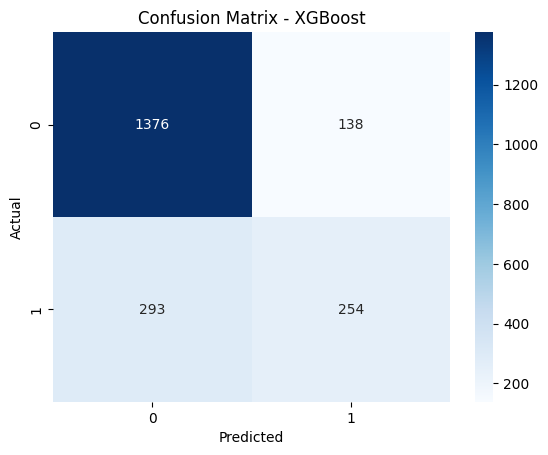

In [358]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()